## Import and Define Convolution Function

In [273]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy


# Convolution Function
def convolve(image, kernel):

    # Get the image dimensions
    image_height = image.shape[0]
    image_width = image.shape[1]
    image_depth = image.shape[2]
   
    # Get the kernel dimensions
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]

    # Empty array for our output image. Size of the input image.
    output = np.zeros((image_height, image_width, image_depth))
    # All the rows except for the edge pixels.
    for y in range(image_height - kernel_height):
        # All the pixels except for the edge pixels.
        for x in range(image_width - kernel_width):  
            for z in range(image_depth):
                #print("Pixel [",y,"]","[",x,"]","[",z,"]")
                # Mat or kernel frame. Part of the image to perform convolution.
                mat = image[y:y+kernel_height, x:x+kernel_width, z]
                # Perform convolution.
                output[y,x,z] = int(np.sum(np.multiply(mat, kernel)))

    # If the output has negative numbers clip to 0->255 range.
    output = np.clip(output,0,255)

    # return image
    return output.astype(np.uint8)

'''

# Convolution Function
def convolve(image, kernel):
    height, width = image.shape
    kernel_size = kernel.shape[0] # kernel is square

    pad_size = kernel_size // 2
    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')
    result = np.zeros((height, width))

    for y in range(height):
        for x in range(width):
            mat = padded_image[y:y+kernel_size, x:x+kernel_size]
            result[y, x] = np.sum(np.multiply(mat, kernel))

    return result
'''



"\n\n# Convolution Function\ndef convolve(image, kernel):\n    height, width = image.shape\n    kernel_size = kernel.shape[0] # kernel is square\n\n    pad_size = kernel_size // 2\n    padded_image = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size)), mode='edge')\n    result = np.zeros((height, width))\n\n    for y in range(height):\n        for x in range(width):\n            mat = padded_image[y:y+kernel_size, x:x+kernel_size]\n            result[y, x] = np.sum(np.multiply(mat, kernel))\n\n    return result\n"

## Read Image

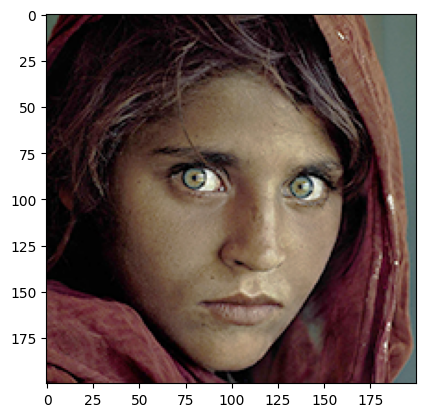

In [274]:
# Import image
img = cv2.imread('./face.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

## Convert Image to Grayscale

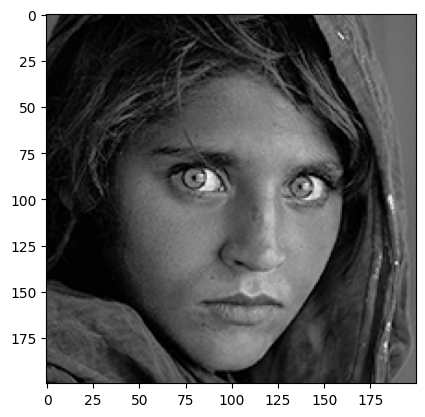

In [275]:

# Convert the image to grayscale
gray = np.zeros((img.shape[0], img.shape[1], img.shape[2]), dtype=np.uint8)
h, w, d = img.shape
#For each row in our grid.
for y in range(0, h):
    #Search each pixel in the row
    for x in range(0, w):
        for z in range(0, d):
            #Converting the color image to greyscale.  Average method.  Divide R,G,B values by 3 and sum them. 
            gray[y,x,0] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
            gray[y,x,1] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3
            gray[y,x,2] = img[y,x,0]/3 + img[y,x,1]/3 + img[y,x,2]/3


'''
gray = np.mean(img, axis=-1).astype(np.uint8)
'''

plt.imshow(gray, cmap='gray')

## Apply Gaussian Blur

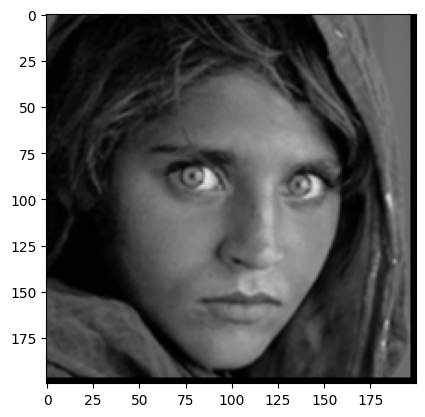

In [276]:
# Apply Gaussian blur to reduce noise
gaussian_kernel = 1/16 * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

blur = convolve(gray, gaussian_kernel)
plt.imshow(blur, cmap="gray")


## Apply Sobel Filter

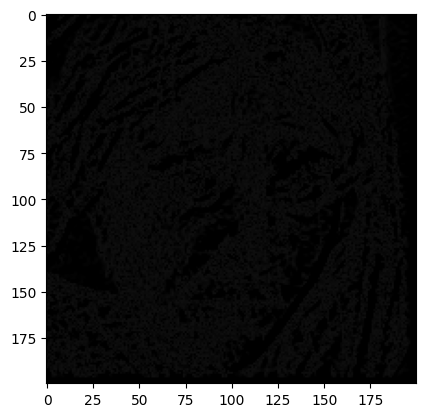

In [277]:
# Define the Sobel kernel for horizontal and vertical edges
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float64)
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float64)

# Apply filter2D to get the horizontal and vertical edges
sobelx = convolve(blur, sobel_kernel_x)
sobely = convolve(blur, sobel_kernel_y)

# Calculate the magnitude of the edges
magnitude = np.sqrt(sobelx**2 + sobely**2).astype(np.uint8)

plt.imshow(magnitude, cmap="gray")

## Apply Thresholding

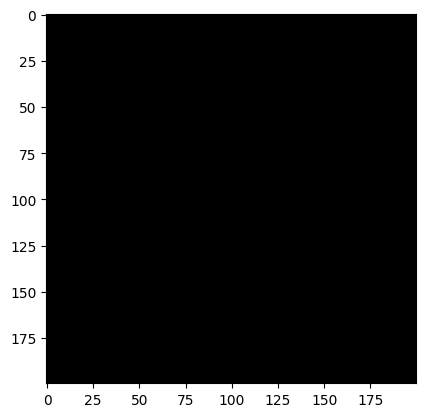

In [278]:
'''
# Apply thresholding to get a binary image.
white = np.array([255,255,255])
black = np.array([0,0,0])
for y in range(0,h):
    #Search each pixel in the row
    for x in range(0,w):
        if (magnitude[y,x] > 100):
            magnitude[y,x] = white
        else:
            magnitude[y,x] = black
'''

threshold = 130
magnitude = np.where(magnitude > threshold, 255, 0)
plt.imshow(magnitude, cmap="gray")



## Show Result

Text(0.5, 1.0, 'Sobel Edge Detection')

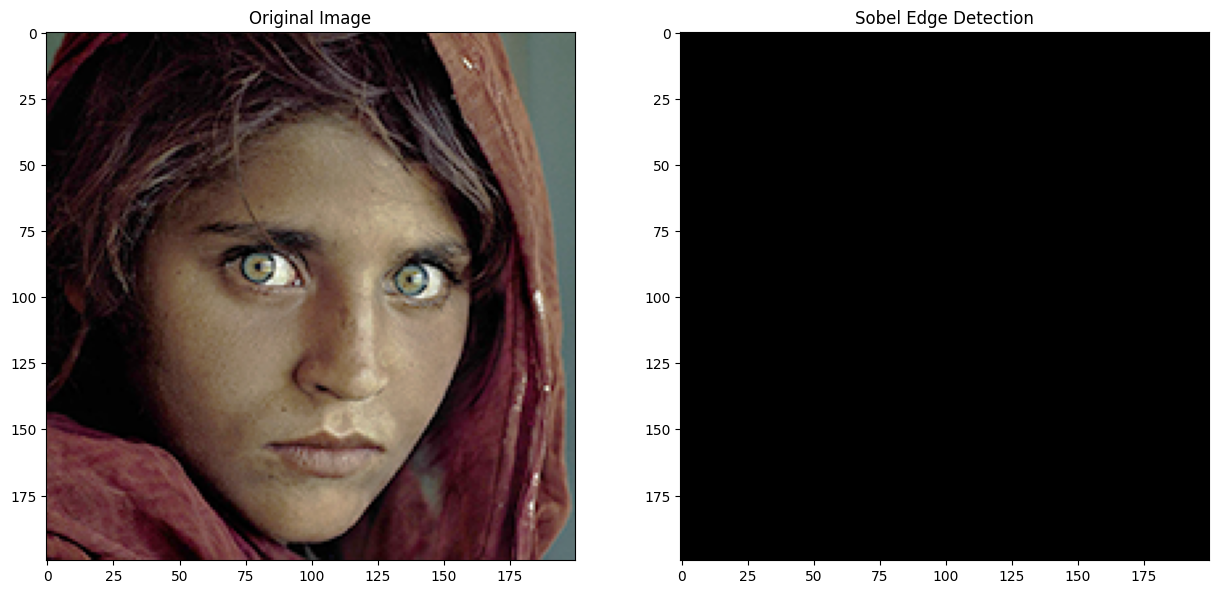

In [279]:
# Display the original image and the resulting edge map using Matplotlib

fig = plt.figure(figsize = (15,15))
fig.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1, 2, 2)
plt.imshow(magnitude, cmap='gray')
plt.title('Sobel Edge Detection')